In [188]:
def mkdata(st):
    dat = np.array([float(x) for x in st.split()]).reshape(9,9)
    dat[dat == -1] = np.nan
    dat = np.flip(dat, 0)
    return dat

In [192]:
import numpy as np

x = '''
-1 1 1 1 2 2 3 2 2
1 -1 -1 -1 -1 -1 -1 -1 -1
0 -1 -1 -1 -1 -1 -1 -1 -1
1 -1 -1 -1 -1 -1 -1 -1 -1
2 -1 -1 -1 -1 -1 -1 -1 -1
2 -1 -1 -1 -1 -1 -1 -1 -1
2 -1 -1 -1 -1 -1 -1 -1 -1
2 -1 -1 -1 -1 -1 -1 -1 -1
2 -1 -1 -1 -1 -1 -1 -1 -1'''

eager = mkdata(x)

In [191]:
x = '''
-1 1 1 1 2 2 3 2 2
1 -1 -1 -1 -1 -1 -1 -1 -1
0 -1 -1 -1 -1 -1 -1 -1 -1
1 -1 -1 -1 -1 -1 -1 -1 -1
2 -1 -1 -1 -1 -1 -1 -1 -1
2 -1 -1 -1 -1 -1 -1 -1 -1
2 -1 -1 -1 -1 -1 -1 -1 -1
2 -1 -1 -1 -1 -1 -1 -1 -1
2 -1 -1 -1 -1 -1 -1 -1 -1'''

inertial = mkdata(x)

In [195]:
x = '''
-1 1 -1 -1 3 3 -1 -1 -1
-1 -1 1 1 -1 -1 -1 -1 -1
-1 -1 -1 -1 -1 -1 -1 -1 -1
1 -1 -1 -1 -1 -1 -1 -1 -1
-1 -1 -1 -1 -1 -1 3 -1 -1
-1 -1 -1 -1 -1 -1 3 -1 -1
-1 -1 -1 -1 -1 -1 -1 2 -1
-1 -1 -1 -1 -1 -1 -1 -1 2
2 -1 -1 -1 -1 -1 -1 -1 -1
'''
chain = mkdata(x)

<IPython.core.display.Javascript object>


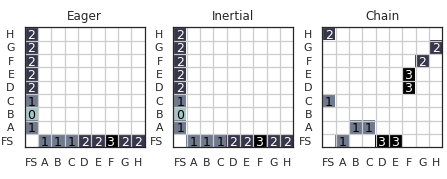

In [200]:
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
sns.set_style("white")
sns.set_context("paper")

REV=True

if REV:
    cm = plt.cm.bone_r
else:
    cm = plt.cm.bone
    
cm.set_bad(color='white')

def makegrid(xmax=9,ymax=9):
    for x in np.arange(.5, xmax, 1):
        plt.axvline(x, 0,ymax, color='gray', linewidth=2)
    for y in np.arange(.5, ymax, 1):
        plt.axhline(y, 0, xmax, color='gray', linewidth=2)
        

LABELS='FS','A','B','C','D','E','F','G','H'

plt.figure(figsize=(5, 2))

def make_plot(ax, data):
    ax.imshow(data, vmin=-1, vmax=3,cmap=cm, interpolation='nearest', extent=(0,9,9,0))
    ax.set_xticks(np.arange(.5, 9.5, 1))
    ax.set_xticks(np.arange(0, 9, 1), minor=True)
    
    ax.set_yticks(np.arange(.5, 9.5, 1))
    ax.set_yticks(np.arange(0, 9, 1), minor=True)
    ax.set_xticklabels(LABELS)
    ax.set_yticklabels(LABELS[::-1])
    ax.grid(which='minor', linewidth=1)

    for x in range(len(data)):
        row = data[x,:]
        for y in range(len(row)):
            num = row[y]
            if not np.isnan(num):
                if REV:
                    col = 'w' if num > 1 else 'k'
                else:
                    col = 'w' if num < 7 else 'k'
                ax.text(y+.5, x+.6, int(num), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        fontsize=10, color=col)
#     makegrid(
    
ax = plt.subplot(1,3,1)
make_plot(ax, eager)
ax.set_title("Eager")

ax = plt.subplot(1,3,2)
make_plot(ax, inertial)
ax.set_title("Inertial")

ax = plt.subplot(1,3,3)
make_plot(ax, chain)
ax.set_title("Chain")
plt.tight_layout(pad=.1)
plt.savefig('connectivity_annotation.pdf')

<IPython.core.display.Javascript object>


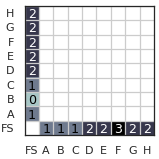

In [205]:
plt.figure(figsize=(1.75,1.75))
ax = plt.subplot()
make_plot(ax, eager)
plt.tight_layout(pad=.1)
plt.savefig("eager_adj.pdf")

<IPython.core.display.Javascript object>


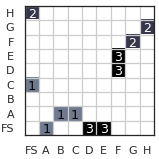

In [206]:
plt.figure(figsize=(1.75,1.75))
ax = plt.subplot()
make_plot(ax, chain)
plt.tight_layout(pad=.1)
plt.savefig("chain_adj.pdf")